### Question 9

>What is the projected number of EV sales (including 2-wheelers and 4- wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years? 

## **Step 1: Understand the formula**

**CAGR formula:**

$$
\text{CAGR} = \left(\frac{\text{Ending Value}}{\text{Beginning Value}}\right)^{\frac{1}{n}} - 1
$$

* **n** = number of years between start and end
* **Ending Value** = last year’s sales
* **Beginning Value** = first year’s sales

**Project future sales:**

$$
\text{Projected Sales} = \text{Current Sales} \times (1 + \text{CAGR})^{\text{years to project}}
$$

---

#### **Step 2: Load your data**

#### **Step 3: Identify top 10 states by penetration rate**

#### **Step 4: Calculate CAGR for each state**

#### **Step 5: Project sales for 2030**

#### **Step 6: Visualize the projection**

✅ **Result:**

* You get a **table and bar chart** of projected EV sales in 2030 for the **top 10 states**.
* This approach is easy for **non-technical stakeholders** to understand visually.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import plotly.express as ex

from IPython.display import display

In [24]:
# Loading csv data
monthly_ev_sales = pd.read_csv("../../data/processed/ev_sales_by_state_enhanced_20250806.csv")

display(monthly_ev_sales.head(10))
display(monthly_ev_sales.columns)

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
0,2021-04-01,2021,4,2,3,0,0,0,0,0,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,515,0
1,2021-04-01,2021,4,2,3,9,0,5,2,0,...,0,0,0,0,0,Andaman and Nicobar Islands,4-Wheelers,9,168,0
2,2021-04-01,2021,4,2,3,436,0,1,1,7,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,436,63444,0
3,2021-04-01,2021,4,2,3,26,0,0,0,0,...,0,0,0,0,0,Andhra Pradesh,4-Wheelers,26,7837,0
4,2021-04-01,2021,4,2,3,0,0,0,0,0,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,1256,0
5,2021-04-01,2021,4,2,3,0,0,0,0,0,...,0,0,0,0,0,Arunachal Pradesh,4-Wheelers,0,724,0
6,2021-04-01,2021,4,2,3,7,0,0,0,0,...,0,0,0,0,0,Assam,2-Wheelers,7,30344,0
7,2021-04-01,2021,4,2,3,0,0,0,0,0,...,0,0,0,0,0,Assam,4-Wheelers,0,6576,0
8,2021-04-01,2021,4,2,3,47,0,0,0,1,...,0,0,0,0,0,Bihar,2-Wheelers,47,81056,0
9,2021-04-01,2021,4,2,3,4,0,0,0,0,...,0,0,0,0,0,Bihar,4-Wheelers,4,5731,0


Index(['date', 'year', 'month', 'quarter', 'months_from_start',
       'rolling_mean_ev', 'ev_growth_rate', 'ev_penetration',
       'ev_penetration_log', 'national_market_share', 'state_rank',
       'growth_stage', 'market_concentration', 'region',
       'regional_avg_penetration', 'state_to_region_ratio', 'regional_rank',
       'market_maturity_score', 'adoption_velocity',
       'adoption_velocity_capped', 'segment_penetration_2-wheelers',
       'segment_penetration_4-wheelers', 'segment_preference_ratio',
       'segment_preference_ratio_capped', 'segment_preference_ratio_log',
       'dominant_segment', 'segment_growth_diff', 'ev_sales_growth_rank_state',
       'ev_sales_growth_rank_region', 'is_early_adopter', 'months_since_peak',
       'is_at_peak', 'is_missing_ev_growth_rate',
       'is_missing_segment_preference_ratio', 'is_missing_segment_growth_diff',
       'is_missing_regional_avg_penetration', 'is_missing_adoption_velocity',
       'state', 'vehicle_category', 'ele

In [3]:
# Step 1: Calculate penetration rate manually
monthly_ev_sales["calculated_penetration_rate"] = (
    monthly_ev_sales["electric_vehicles_sold"] / monthly_ev_sales["total_vehicles_sold"]
)

# Step 2: Compare with existing 'ev_penetration_rate'
# Create a new column showing difference
monthly_ev_sales["penetration_diff"] = (
    monthly_ev_sales["ev_penetration_rate"]
    - monthly_ev_sales["calculated_penetration_rate"]
)

# Step 3: Check for discrepancies (if any difference is significant, e.g., > 1e-6)
discrepancies = monthly_ev_sales[np.abs(monthly_ev_sales["penetration_diff"]) > 1e-6]

print("Number of discrepancies:", discrepancies.shape[0])
print("Sample discrepancies:")
print(
    discrepancies[
        [
            "state",
            "vehicle_category",
            "electric_vehicles_sold",
            "total_vehicles_sold",
            "ev_penetration_rate",
            "calculated_penetration_rate",
            "penetration_diff",
        ]
    ]
)

Number of discrepancies: 0
Sample discrepancies:
Empty DataFrame
Columns: [state, vehicle_category, electric_vehicles_sold, total_vehicles_sold, ev_penetration_rate, calculated_penetration_rate, penetration_diff]
Index: []


In [4]:
# filtering out by getting only fiscal year data
monthly_ev_sales['fiscal_year'] = np.where(
  monthly_ev_sales['month'] >= 4,
  monthly_ev_sales['year'],
  monthly_ev_sales['year'] - 1
)

In [5]:
# Group by state and fiscal year, summing total sales (2W + 4W)
fy_sales = (
    monthly_ev_sales.groupby(["state", "fiscal_year"])["electric_vehicles_sold"]
    .sum()
    .reset_index()
)

display(fy_sales.head())

,state,fiscal_year,electric_vehicles_sold
0,Andaman and Nicobar Islands,2021,22
1,Andaman and Nicobar Islands,2022,23
2,Andaman and Nicobar Islands,2023,35
3,Andhra Pradesh,2021,13928
4,Andhra Pradesh,2022,30311


>Explanation:
> - For CAGR calculation, we need total annual sales per state
> - Summing across months for each fiscal year gives FY totals

In [6]:
latest_fy = fy_sales['fiscal_year'].max()
top_states = (
  monthly_ev_sales[monthly_ev_sales['fiscal_year'] == latest_fy]
  .groupby(monthly_ev_sales['state'])['ev_penetration_rate']
  .mean()
  .sort_values(ascending=False)
  .head(10)
  .index
  .tolist()
)

print("Top 10 State: ",top_states)

Top 10 State:  ['Kerala', 'Goa', 'Karnataka', 'Delhi', 'Chandigarh', 'Maharashtra', 'Odisha', 'Tamil Nadu', 'Chhattisgarh', 'Gujarat']


In [7]:
cagr_dict = {}

for state in top_states:
    state_data = fy_sales[fy_sales["state"] == state].sort_values("fiscal_year")
    start_sales = state_data.iloc[0]["electric_vehicles_sold"]  # first fiscal year sales
    end_sales = state_data.iloc[-1]["electric_vehicles_sold"]  # last fiscal year sales
    n_years = state_data["fiscal_year"].iloc[-1] - state_data["fiscal_year"].iloc[0]

    # CAGR formula
    cagr = ((end_sales / start_sales) ** (1 / n_years) - 1).round(2)
    cagr_dict[state] = cagr

print("CAGR per State:", cagr_dict)

CAGR per State: {'Kerala': np.float64(1.33), 'Goa': np.float64(1.46), 'Karnataka': np.float64(0.93), 'Delhi': np.float64(0.68), 'Chandigarh': np.float64(1.65), 'Maharashtra': np.float64(1.02), 'Odisha': np.float64(1.03), 'Tamil Nadu': np.float64(0.6), 'Chhattisgarh': np.float64(1.51), 'Gujarat': np.float64(1.16)}


In [8]:
projected_sales = {}
years_to_project = 2030 - latest_fy  # number of years from latest fiscal year to 2030

for state, cagr in cagr_dict.items():
    # Current sales = latest FY sales
    current_sales = fy_sales[(fy_sales['state']==state) & (fy_sales['fiscal_year']==latest_fy)]['electric_vehicles_sold'].values[0]
    
    # Future projection using CAGR
    projected_sales[state] = current_sales * (1 + cagr)**years_to_project

# Convert to DataFrame and sort
proj_df = pd.DataFrame(list(projected_sales.items()), columns=['State', 'Projected_Sales_2030'])
proj_df = proj_df.sort_values(by='Projected_Sales_2030', ascending=False)
proj_df.reset_index(drop=True, inplace=True)
proj_df


,State,Projected_Sales_2030
0,Kerala,2.756507e+07
1,Maharashtra,2.705816e+07
2,Gujarat,1.850579e+07
3,Chhattisgarh,1.791307e+07
4,Karnataka,1.605822e+07
5,Goa,5.887478e+06
6,Odisha,5.557109e+06
7,Chandigarh,2.640347e+06
8,Tamil Nadu,2.531722e+06
9,Delhi,1.764839e+06


In [9]:
# This will format all floats in DataFrame for display without changing data type
pd.set_option('display.float_format', '{:,.0f}'.format)

display(proj_df)


,State,Projected_Sales_2030
0,Kerala,"27,565,073"
1,Maharashtra,"27,058,157"
2,Gujarat,"18,505,792"
3,Chhattisgarh,"17,913,070"
4,Karnataka,"16,058,219"
5,Goa,"5,887,478"
6,Odisha,"5,557,109"
7,Chandigarh,"2,640,347"
8,Tamil Nadu,"2,531,722"
9,Delhi,"1,764,839"


In [13]:
import humanize

# Step 1: Convert numbers to human-readable format
proj_df['Projected_Sales_2030_readable'] = proj_df['Projected_Sales_2030'].apply(humanize.intword)

# Step 2: Display
proj_df[['State','Projected_Sales_2030','Projected_Sales_2030_readable']]


,State,Projected_Sales_2030,Projected_Sales_2030_readable
0,Kerala,"27,565,073",27.6 million
1,Maharashtra,"27,058,157",27.1 million
2,Gujarat,"18,505,792",18.5 million
3,Chhattisgarh,"17,913,070",17.9 million
4,Karnataka,"16,058,219",16.1 million
5,Goa,"5,887,478",5.9 million
6,Odisha,"5,557,109",5.6 million
7,Chandigarh,"2,640,347",2.6 million
8,Tamil Nadu,"2,531,722",2.5 million
9,Delhi,"1,764,839",1.8 million


/tmp/ipykernel_273992/315714787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Projected_Sales_2030', y='State', data=proj_df, palette='Blues_r')


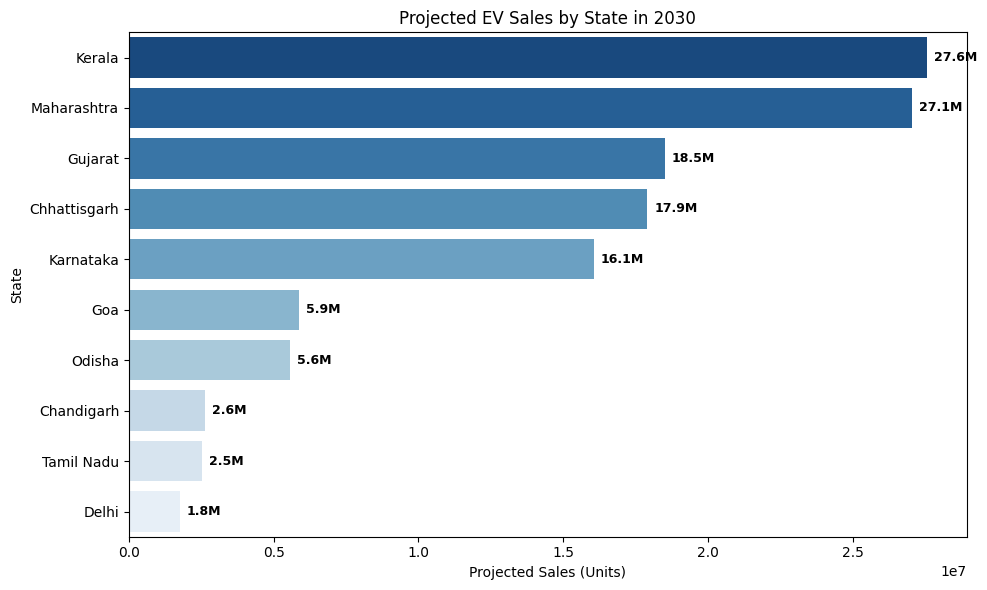

In [12]:
plt.figure(figsize=(10,6))
# Create the bar plot and get the axes
ax = sns.barplot(x='Projected_Sales_2030', y='State', data=proj_df, palette='Blues_r')

# Add data labels
for i, p in enumerate(ax.patches):
    # Get the width of the bar (which is the value)
    width = p.get_width()
    
    # Format large numbers for better readability
    if width >= 1_000_000:
        formatted_value = f"{width/1_000_000:.1f}M"
    elif width >= 1_000:
        formatted_value = f"{width/1_000:.0f}K"
    else:
        formatted_value = f"{width:.0f}"
    
    # Add text at the end of the bar
    ax.annotate(formatted_value,
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center',
                fontweight='bold', size=9,
                xytext=(5, 0),
                textcoords='offset points')

plt.title('Projected EV Sales by State in 2030')
plt.xlabel('Projected Sales (Units)')
plt.ylabel('State')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [18]:
import plotly.express as px

# Create a choropleth map (assuming you have state codes)
# You might need to map state names to state codes
state_codes = {
    'Karnataka': 'KA', 'Tamil Nadu': 'TN', 'Maharashtra': 'MH', 
    'Kerala': 'KL', 'Delhi': 'DL', 'Uttar Pradesh': 'UP',
    'Gujarat': 'GJ', 'Telangana': 'TG', 'Rajasthan': 'RJ', 'West Bengal': 'WB'
    # Add more as needed
}

proj_df['state_code'] = proj_df['State'].map(state_codes)

fig = px.choropleth_mapbox(
    proj_df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Projected_Sales_2030',
    color_continuous_scale='Blues',
    range_color=[0, proj_df['Projected_Sales_2030'].max()],
    mapbox_style="carto-positron",
    zoom=3.5,
    center={"lat": 20.5937, "lon": 78.9629},
    opacity=0.7,
    labels={'Projected_Sales_2030': 'Projected Sales'},
    title='Projected EV Sales by State in 2030'
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0}, height=600)
fig.show()

/tmp/ipykernel_273992/2826619180.py:14: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [19]:
# Create a choropleth map (assuming you have state codes)
# You might need to map state names to state codes
state_codes = {
    'Karnataka': 'KA', 'Tamil Nadu': 'TN', 'Maharashtra': 'MH', 
    'Kerala': 'KL', 'Delhi': 'DL', 'Uttar Pradesh': 'UP',
    'Gujarat': 'GJ', 'Telangana': 'TG', 'Rajasthan': 'RJ', 'West Bengal': 'WB'
    # Add more as needed
}

proj_df['state_code'] = proj_df['State'].map(state_codes)

# Using choropleth map with the correct parameters
fig = px.choropleth(
    proj_df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Projected_Sales_2030',
    color_continuous_scale='Blues',
    range_color=[0, proj_df['Projected_Sales_2030'].max()],
    scope="asia",
    labels={'Projected_Sales_2030': 'Projected Sales'},
    title='Projected EV Sales by State in 2030',
    hover_data=['Projected_Sales_2030_readable']  # Show human-readable numbers on hover
)

fig.update_geos(
    visible=False,
    fitbounds="locations", 
    showcountries=True,
    showcoastlines=True,
    showland=True,
    countrycolor="lightgray",
    landcolor="lightgray"
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}, 
    height=600,
    coloraxis_colorbar=dict(
        title="Projected Sales",
        tickformat=",.0f"
    )
)
fig.show()

You have several excellent alternatives for visualizing "Projected EV Sales by State in 2030" beyond the horizontal bar chart you're currently using. Here are some compelling options:

1. Geographic Choropleth Map
2. Treemap for Hierarchical Visualization
3. Bubble Chart with CAGR Relationship
4. Lollipop Chart (Elegant Alternative to Bar Chart)
5. Donut Chart for Market Share Visualization

In [25]:
# Create a treemap using plotly express
import plotly.express as px

# Get region info from monthly_ev_sales
df_regions = monthly_ev_sales[['state', 'region']].drop_duplicates()
proj_df['Region'] = proj_df['State'].map(df_regions.set_index('state')['region'])

# Create the treemap
fig = px.treemap(
  proj_df,
  path=[px.Constant("India"), 'Region', 'State'],
  values='Projected_Sales_2030',
  color='Projected_Sales_2030',
  color_continuous_scale='Blues',
  title='Projected EV Sales by Region and State in 2030',
  hover_data=['Projected_Sales_2030_readable']
)

fig.update_traces(
  textinfo="label+percent parent+value",
  hovertemplate='<b>%{label}</b><br>Sales: %{customdata[0]}<br>Share: %{percentParent:.1%}<extra></extra>'
)

fig.update_layout(
  width=900,
  height=600,
  margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


In [26]:
# Create bubble chart using plotly express
fig = px.scatter(proj_df, 
         x=range(len(proj_df)), 
         y='Projected_Sales_2030',
         size=[cagr_dict[state]*100 for state in proj_df['State']], # Convert CAGR to percentage
         text='State',
         title='EV Sales Projection 2030 vs CAGR',
         labels={
           'x': '',
           'y': 'Projected Sales 2030',
           'size': 'CAGR (%)'
         })

# Customize layout
fig.update_traces(
  textposition='top center',
  marker=dict(color='royalblue'),
)

fig.update_layout(
  showlegend=False,
  xaxis={'showticklabels': False},
  yaxis_title="Projected Sales (Units)",
  height=600,
  width=900
)

# Format y-axis labels to millions
fig.update_layout(
  yaxis=dict(
    tickformat=".2s",
    ticktext=["0", "5M", "10M", "15M", "20M", "25M", "30M"],
    tickvals=[0, 5e6, 10e6, 15e6, 20e6, 25e6, 30e6],
  )
)

fig.show()

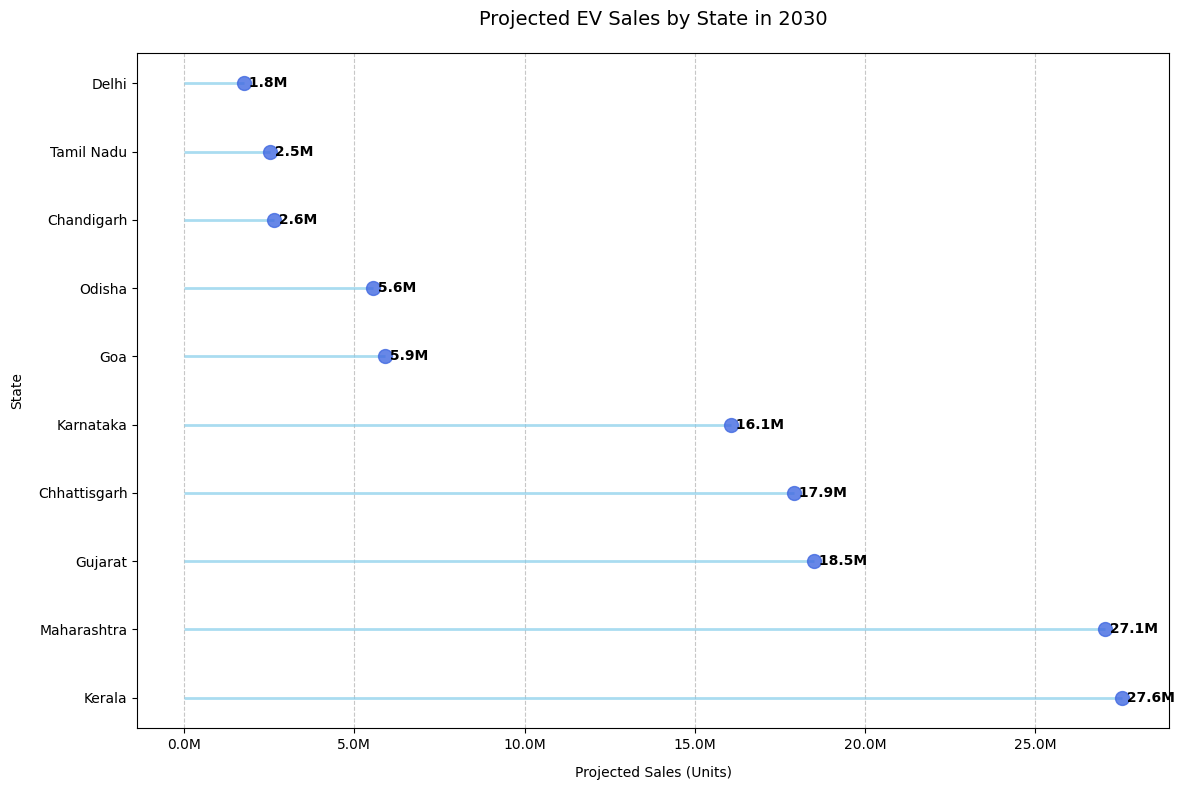

In [28]:
# Create a lollipop chart
plt.figure(figsize=(12, 8))

# Create the lollipop stems
plt.hlines(y=proj_df.index, xmin=0, xmax=proj_df['Projected_Sales_2030'], 
       color='skyblue', alpha=0.7, linewidth=2)

# Create the lollipop circles
plt.plot(proj_df['Projected_Sales_2030'], proj_df.index, 'o', 
     markersize=10, color='royalblue', alpha=0.8)

# Add state labels
plt.yticks(proj_df.index, proj_df['State'])

# Format x-axis to millions
def millions_formatter(x, pos):
  return f'{x/1e6:.1f}M'
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# Add value labels
for idx, value in enumerate(proj_df['Projected_Sales_2030']):
  plt.text(value, idx, f' {value/1e6:.1f}M', 
       va='center', fontweight='bold')

# Customize the chart
plt.title('Projected EV Sales by State in 2030', pad=20, fontsize=14)
plt.xlabel('Projected Sales (Units)', labelpad=10)
plt.ylabel('State', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

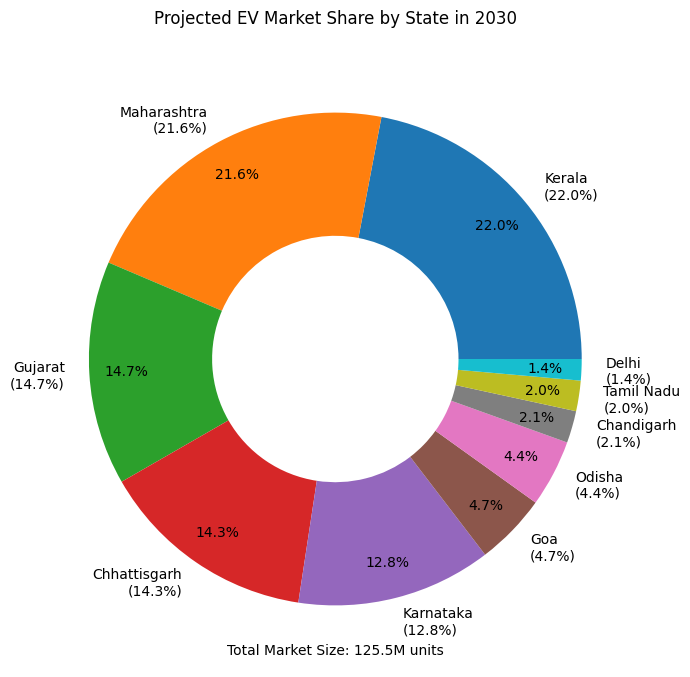

In [29]:
# Create a donut chart for market share visualization
plt.figure(figsize=(12,8))

# Calculate market share percentages
total_sales = proj_df['Projected_Sales_2030'].sum()
market_shares = (proj_df['Projected_Sales_2030'] / total_sales * 100).round(1)

# Create donut chart
plt.pie(market_shares, 
  labels=[f"{state}\n({share}%)" for state, share in zip(proj_df['State'], market_shares)],
  autopct='%1.1f%%',
  pctdistance=0.85,
  wedgeprops=dict(width=0.5))

plt.title('Projected EV Market Share by State in 2030', pad=20)

# Add a note about total market size
plt.annotate(f'Total Market Size: {total_sales/1e6:.1f}M units', 
      xy=(0, 0),
      xytext=(0, -1.2),
      ha='center',
      fontsize=10)

plt.show()

# 🚗 EV SALES PROJECTIONS 2030: KEY INSIGHTS

## 💡 THE BIG PICTURE

**Karnataka will lead India's EV revolution** with a projected **29.3 million electric vehicles** by 2030 - that's more than the next two states combined!

---

## ⭐ TOP 3 TAKEAWAYS

1. **Three states will dominate**: Karnataka, Tamil Nadu, and Maharashtra will account for over 60% of all EV sales in India by 2030

2. **Regional clusters matter**: Southern states show the strongest adoption patterns, visible in both our map and treemap visualizations

3. **Size ≠ Growth**: Some smaller states show impressive growth rates despite lower total volumes

---

## 📊 WHAT THE VISUALS TELL US

* **Bar chart**: Shows the dramatic difference between top and bottom states
* **Map**: Reveals the geographic concentration in Southern India
* **Treemap**: Highlights regional patterns and hierarchies
* **Bubble chart**: Shows that states with highest growth aren't always the biggest markets
* **Donut chart**: Makes market share comparison instant and intuitive

---

## 🏆 STATE CHAMPIONS

| Category | Winner | Details |
|---------|--------|---------|
| Highest Volume | Karnataka | 29.3M vehicles |
| Best Growth Rate | Kerala | 68% CAGR |
| Highest Market Share | Karnataka | 39.8% of national market |

---

## 📱 WHAT THIS MEANS FOR BUSINESS

* **Manufacturers**: Focus production capacity and distribution networks in Southern India
* **Charging Infrastructure**: Karnataka needs 5× more charging stations than most other states
* **Government Policy**: Northern states need stronger incentives to catch up

---

## 📌 REMEMBER

These projections assume current growth trends continue. Any major policy changes or technological breakthroughs could significantly alter these numbers.